# Import libraries

In [128]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Read the dataset

In [88]:
# read the data by os
train_path = os.path.join(os.getcwd(),".." , "dataset","train.csv")
train_df = pd.read_csv(train_path)

In [89]:
# print the first 5 rows of the data
train_df.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [90]:
# print the last 5 rows of the data
train_df.tail()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
2185  2185  361    1014.6     23.2         20.6     19.1      19.9      97.0   
2186  2186  362    1012.4     17.2         17.3     16.3      15.3      91.0   
2187  2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   
2188  2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   
2189  2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
2185   88.0       0.1           40.0       22.1         1  
2186   88.0       0.0           50.0       35.3         1  
2187   79.0       5.0           40.0       32.9         1  
2188   93.0       0.1           40.0       18.0         1  
2189   88.0       1.0           70.0       48.0         1

In [91]:
# read the test data
test_path = os.path.join(os.getcwd(),".." , "dataset","test.csv")
test_df = pd.read_csv(test_path)

# EDA

In [92]:
# print the shape of the data
print("Train shape: ", train_df.shape)
print("Test shape: ", test_df.shape)

Train shape:  (2190, 13)
Test shape:  (730, 12)


In [93]:
train_df.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>],
       [<Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

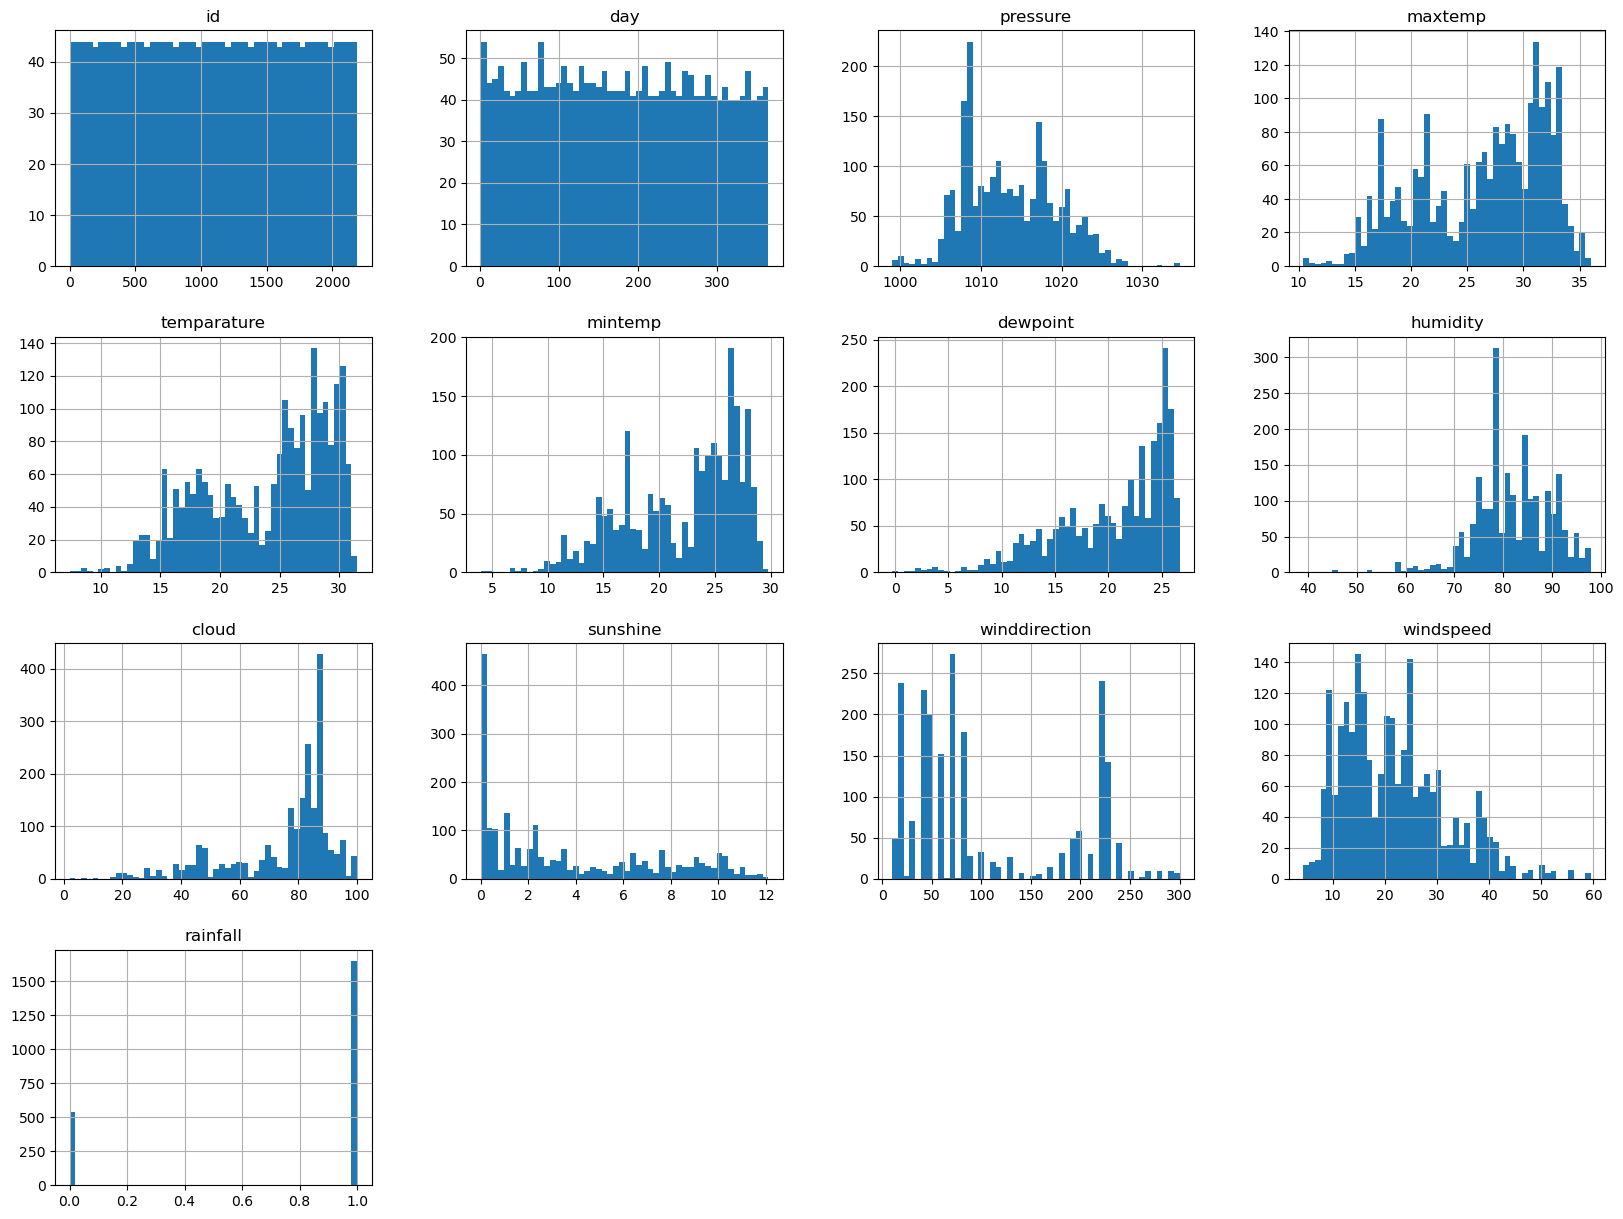

In [95]:
train_df.hist(bins=50, figsize=(20,15))

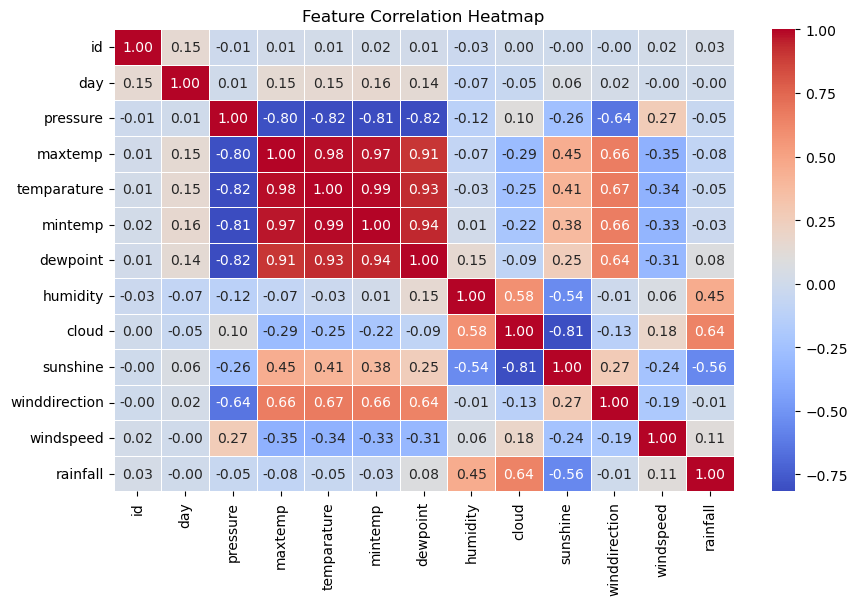

In [96]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

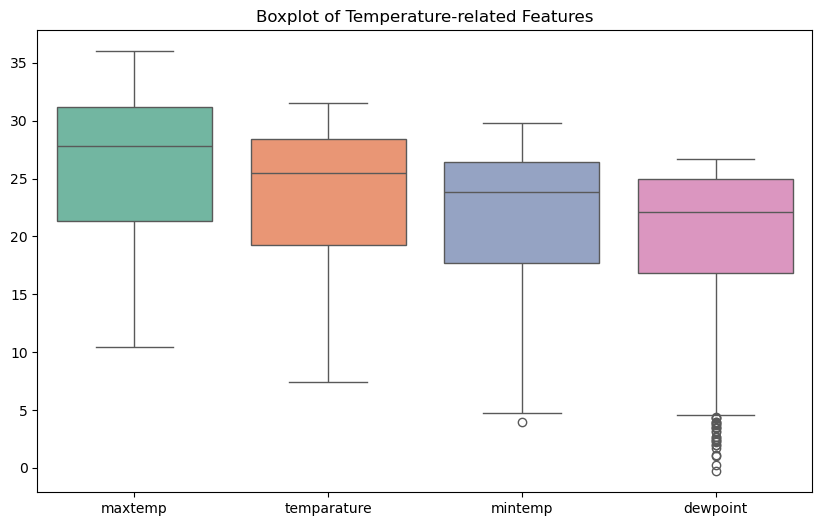

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[['maxtemp', 'temparature', 'mintemp', 'dewpoint']], palette="Set2")
plt.title("Boxplot of Temperature-related Features")
plt.show()

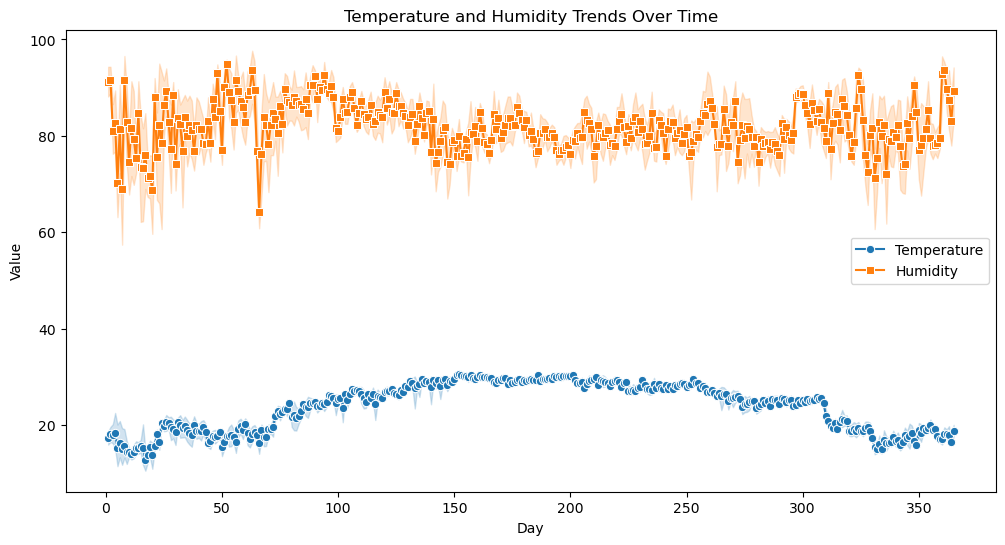

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_df['day'], y=train_df['temparature'], label="Temperature", marker="o")
sns.lineplot(x=train_df['day'], y=train_df['humidity'], label="Humidity", marker="s")
plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Temperature and Humidity Trends Over Time")
plt.legend()
plt.show()

# Preprocessing

In [99]:
# drop the id column in training and test data
train_df.drop(columns=['id'], inplace=True)
test_df.drop(columns=['id'], inplace=True)

In [100]:
# split the data into features and target
X = train_df.drop(columns=['rainfall'])
y = train_df['rainfall']

In [101]:
# Create a validation set (e.g., 80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [102]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1752, 11) (438, 11) (1752,) (438,)


In [103]:
# define the test data
X_test = test_df
print(X_test.shape)

(730, 11)


In [116]:
num_columns = X_train.columns

# Define the numerical pipeline
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Create a ColumnTransformer that only applies the numerical pipeline
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_columns)
])

# Fit the preprocessor on the training data and transform the training, validation, and test sets
X_train_final = preprocessor.fit_transform(X_train)
X_val_final = preprocessor.transform(X_val)
X_test_final = preprocessor.transform(X_test)

print("Transformed training shape:", X_train_final.shape)
print("Transformed validation shape:", X_val_final.shape)
print("Transformed test shape:", X_test_final.shape)

Transformed training shape: (1752, 11)
Transformed validation shape: (438, 11)
Transformed test shape: (730, 11)


In [117]:
ARTIFACT_FOLDER_PATH = os.path.join(os.getcwd(), "..", "artifacts")
os.makedirs(ARTIFACT_FOLDER_PATH, exist_ok=True)

In [118]:
joblib.dump(preprocessor, os.path.join(ARTIFACT_FOLDER_PATH, "preprocessor.pkl"))

['d:\\ML PROJECTS\\kaggle competetion\\notebook\\..\\artifacts\\preprocessor.pkl']

# Model development and evaluation

In [136]:
rf_model = RandomForestClassifier(random_state=42,n_jobs=-1)

# Train the model
rf_model.fit(X_train_final, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val_final)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print("Random Forest Validation Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_val, y_val_pred_rf))


Random Forest Validation Accuracy: 0.865296803652968
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       108
           1       0.89      0.94      0.91       330

    accuracy                           0.87       438
   macro avg       0.83      0.79      0.81       438
weighted avg       0.86      0.87      0.86       438



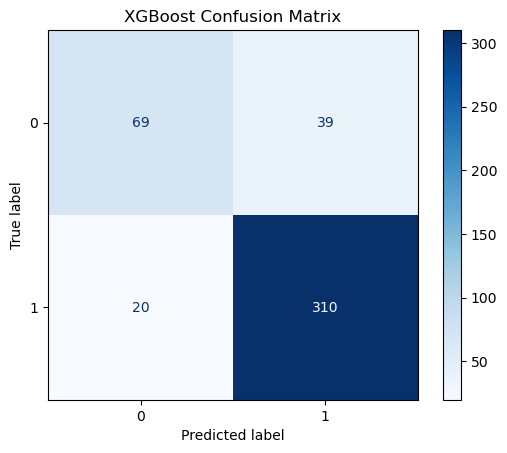

In [137]:
cm = confusion_matrix(y_val, y_val_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

In [ ]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train_final, y_train)

# Predict on the validation set
y_val_pred_lr = lr_model.predict(X_val_final)

# Evaluate the model
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
print("Logistic Regression Validation Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_val, y_val_pred_lr))


Logistic Regression Validation Accuracy: 0.865296803652968
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       108
           1       0.88      0.95      0.91       330

    accuracy                           0.87       438
   macro avg       0.84      0.78      0.80       438
weighted avg       0.86      0.87      0.86       438

Confusion Matrix:
[[ 67  41]
 [ 18 312]]


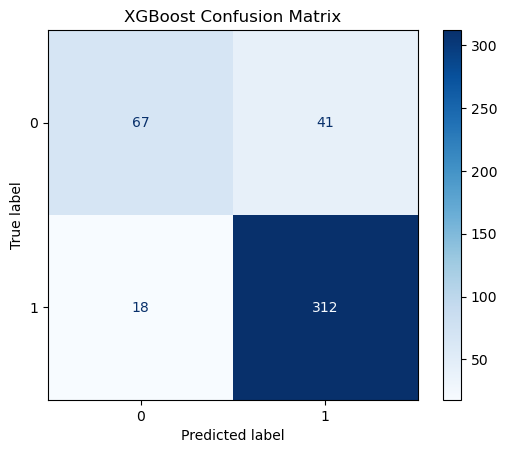

In [135]:
cm = confusion_matrix(y_val, y_val_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

In [134]:
xgb_model = XGBClassifier(random_state=42, max_depth=3, n_estimators=100, learning_rate=0.1, n_jobs=-1)

# Train the model on the preprocessed training data
xgb_model.fit(X_train_final, y_train)

# Predict on the validation set
y_val_pred_xgb = xgb_model.predict(X_val_final)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print("XGBoost Validation Accuracy:", accuracy_xgb)
print("Classification Report:")
print(classification_report(y_val, y_val_pred_xgb))


XGBoost Validation Accuracy: 0.8721461187214612
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       108
           1       0.89      0.95      0.92       330

    accuracy                           0.87       438
   macro avg       0.85      0.79      0.81       438
weighted avg       0.87      0.87      0.87       438



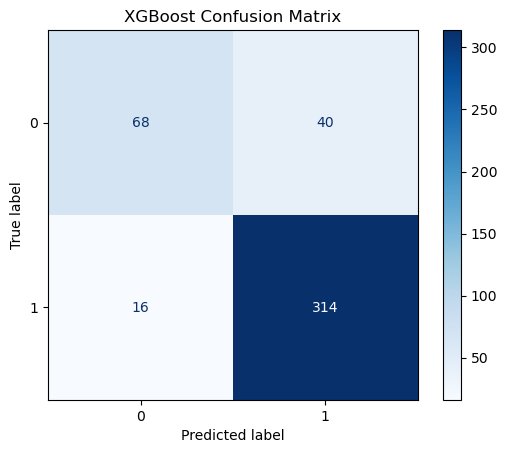

In [129]:
# Draw the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

In [133]:
# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_final, y_train)

# Predict on the validation set
y_val_pred_knn = knn_model.predict(X_val_final)

# Evaluate the model
accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print("K-Nearest Neighbors Validation Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_val, y_val_pred_knn))



K-Nearest Neighbors Validation Accuracy: 0.8584474885844748
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.68       108
           1       0.88      0.94      0.91       330

    accuracy                           0.86       438
   macro avg       0.83      0.77      0.79       438
weighted avg       0.85      0.86      0.85       438



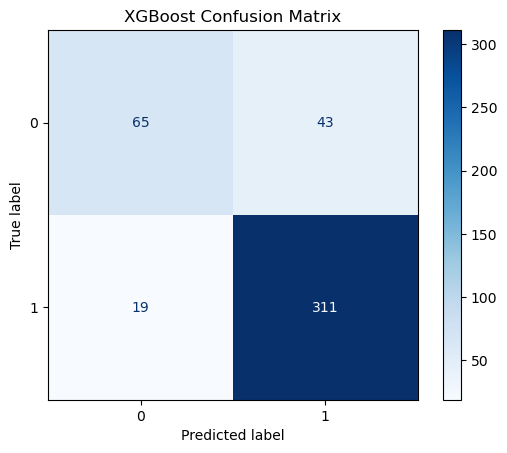

In [132]:
# Draw the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

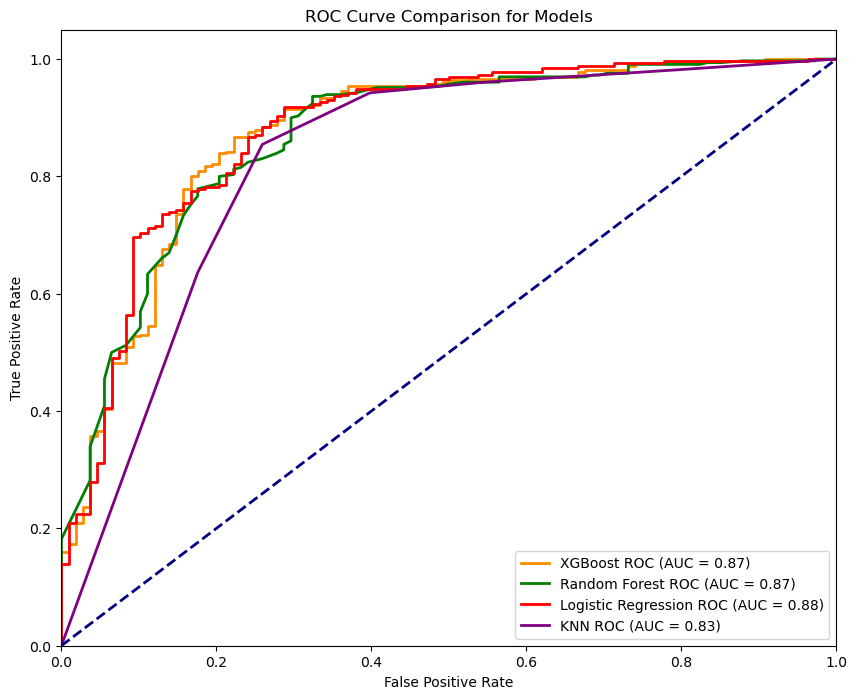

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# --- Compute ROC for XGBoost ---
y_val_prob_xgb = xgb_model.predict_proba(X_val_final)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_val_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# --- Compute ROC for Random Forest ---
y_val_prob_rf = rf_model.predict_proba(X_val_final)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# --- Compute ROC for Logistic Regression ---
y_val_prob_lr = lr_model.predict_proba(X_val_final)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_val_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# --- Compute ROC for K-Nearest Neighbors ---
y_val_prob_knn = knn_model.predict_proba(X_val_final)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_val, y_val_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, 
         label=f'XGBoost ROC (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, 
         label=f'Random Forest ROC (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, 
         label=f'Logistic Regression ROC (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, 
         label=f'KNN ROC (AUC = {roc_auc_knn:.2f})')

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Models')
plt.legend(loc="lower right")
plt.show()


# Evaluation on test data

In [144]:
# Ensure the test DataFrame has exactly 730 rows
if test_df.shape[0] == 731:
    test_df = test_df.iloc[:730]
    print("Adjusted test DataFrame to 730 rows.")

# Predict on the preprocessed test data
y_test_pred = xgb_model.predict(X_test_final)

# If the test data has an 'id' column, use it. Otherwise, create an 'id' column starting from 2190.
if "id" in test_df.columns:
    submission = pd.DataFrame({
        "id": test_df["id"],
        "rainfall": y_test_pred
    })
else:
    submission = pd.DataFrame({
        "id": range(2190, 2190 + test_df.shape[0]),
        "rainfall": y_test_pred
    })

# Print the submission DataFrame (first 20 rows)
print("Submission Preview:")
print(submission.head(20))

# Save the submission file to CSV without an index
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")


Submission Preview:
      id  rainfall
0   2190         1
1   2191         1
2   2192         1
3   2193         0
4   2194         0
5   2195         1
6   2196         1
7   2197         1
8   2198         1
9   2199         1
10  2200         1
11  2201         0
12  2202         1
13  2203         1
14  2204         0
15  2205         0
16  2206         1
17  2207         1
18  2208         0
19  2209         0
Submission file created: submission.csv
